In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


All the data is in right format(integer) except Gender column.

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
#unique values in each column
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
df_unique

,Variable,DistinctCount
0,User ID,400
1,Gender,2
2,Age,43
3,EstimatedSalary,117
4,Purchased,2


All data in the UserID is Unique, so removing from the data frame.

In [6]:
df=df.drop(['User ID'], axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


# Encode Gender( since binary group) with label encoding.

In [7]:
df['Gender'] = df['Gender'].map({'Male':0 ,'Female':1})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


<AxesSubplot:>

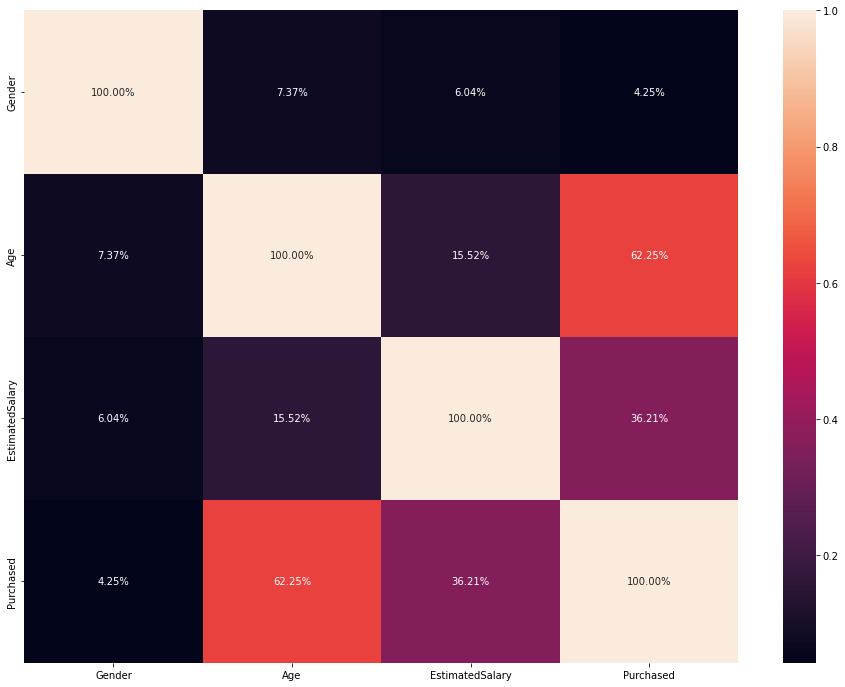

In [8]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

# Splitting the dataset into the Training set and Test set
# Fitting decision tree to the Training set

In [14]:
X = df[['Gender','Age', 'EstimatedSalary']].values
y = df['Purchased'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train_scaled, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test_scaled)
y_pred
#print(y_pred[0:5])

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

# Crossvalidation to indentify best depth of the tree

In [17]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train_scaled, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train_scaled)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X, y, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.84  Cross val score :  0.825
Depth  :  2  Training Accuracy :  0.93  Cross val score :  0.8949999999999999
Depth  :  3  Training Accuracy :  0.9333333333333333  Cross val score :  0.85
Depth  :  4  Training Accuracy :  0.9466666666666667  Cross val score :  0.8724999999999999
Depth  :  5  Training Accuracy :  0.9633333333333334  Cross val score :  0.8775000000000001
Depth  :  6  Training Accuracy :  0.9733333333333334  Cross val score :  0.8649999999999999
Depth  :  7  Training Accuracy :  0.98  Cross val score :  0.86
Depth  :  8  Training Accuracy :  0.9866666666666667  Cross val score :  0.8474999999999999
Depth  :  9  Training Accuracy :  0.9866666666666667  Cross val score :  0.845
Depth  :  10  Training Accuracy :  0.99  Cross val score :  0.8425
Depth  :  20  Training Accuracy :  0.9966666666666667  Cross val score :  0.8400000000000001


With depth = 2. contruct the model

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier(max_depth=2)

# Fit dt to the training set
dt.fit(X_train_scaled, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test_scaled)
y_pred
#print(y_pred[0:5])

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

Test set accuracy: 0.87
Test set auc: 0.88
Train set AUC :  0.9350465197273496


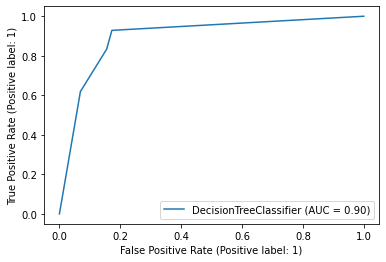

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test_scaled) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test_scaled, y_test)


acc = roc_auc_score(y_train, dt.predict(X_train_scaled))
print("Train set AUC : ", acc)

In [20]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred)
#logistic_regression.score(X_test,y_test)
# rf.roc_auc_score(y_test, y_pred)

0.8571428571428572

In [21]:
confusion_matrix(y_test,y_pred)

array([[48, 10],
       [ 3, 39]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

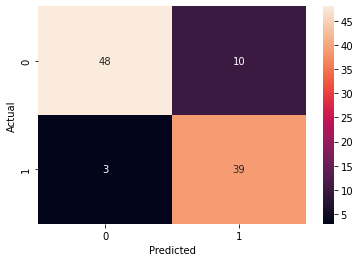

In [22]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Feature Importances

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

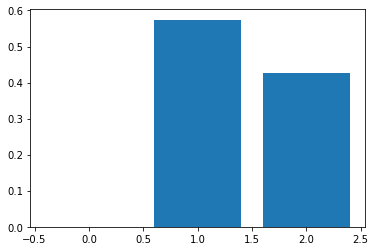

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 2)
# Fit dt to the training set
dt.fit(X_train, y_train)
importance = dt.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

# Visualising the tree

[Text(167.4, 181.2, 'X[1] <= 42.5\ngini = 0.462\nsamples = 320\nvalue = [204, 116]'),
 Text(83.7, 108.72, 'X[2] <= 93000.0\ngini = 0.284\nsamples = 228\nvalue = [189, 39]'),
 Text(41.85, 36.23999999999998, 'gini = 0.08\nsamples = 192\nvalue = [184, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.239\nsamples = 36\nvalue = [5, 31]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 41500.0\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(292.95, 36.23999999999998, 'gini = 0.367\nsamples = 62\nvalue = [15, 47]')]

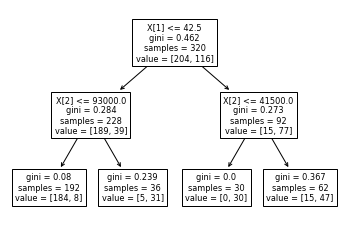

In [25]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt

[Text(167.4, 181.2, 'X[1] <= 42.5\ngini = 0.462\nsamples = 320\nvalue = [204, 116]'),
 Text(83.7, 108.72, 'X[2] <= 93000.0\ngini = 0.284\nsamples = 228\nvalue = [189, 39]'),
 Text(41.85, 36.23999999999998, 'gini = 0.08\nsamples = 192\nvalue = [184, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.239\nsamples = 36\nvalue = [5, 31]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 41500.0\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(292.95, 36.23999999999998, 'gini = 0.367\nsamples = 62\nvalue = [15, 47]')]

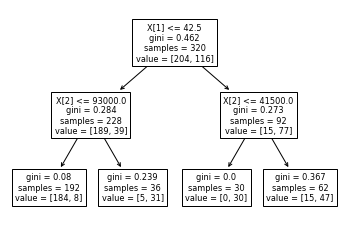

In [29]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt

[Text(167.4, 181.2, 'X[1] <= 42.5\ngini = 0.462\nsamples = 320\nvalue = [204, 116]'),
 Text(83.7, 108.72, 'X[2] <= 93000.0\ngini = 0.284\nsamples = 228\nvalue = [189, 39]'),
 Text(41.85, 36.23999999999998, 'gini = 0.08\nsamples = 192\nvalue = [184, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.239\nsamples = 36\nvalue = [5, 31]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 41500.0\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(292.95, 36.23999999999998, 'gini = 0.367\nsamples = 62\nvalue = [15, 47]')]

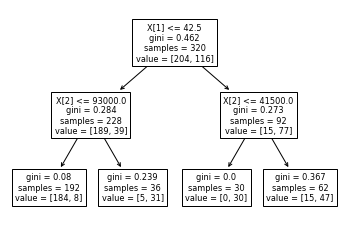

In [30]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt